# Perceptron multicamadas -MLP com Keras
Prof. Fernando Amaral

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os Dados
df = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [15]:
df.shape

(144, 1)

In [16]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [3]:
# Converter os dados para float32 - O Keras trabalha com este Type
data = data.astype('float32')

In [4]:
# Separando os dados em Treino e Teste
train = data[0:125, :]
test = data[125:, :]

In [5]:
# Cria a função para tratamento / preparação dos Dados
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)   

In [6]:
# Aplica a função de preparação dos dados na base treino e teste
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test

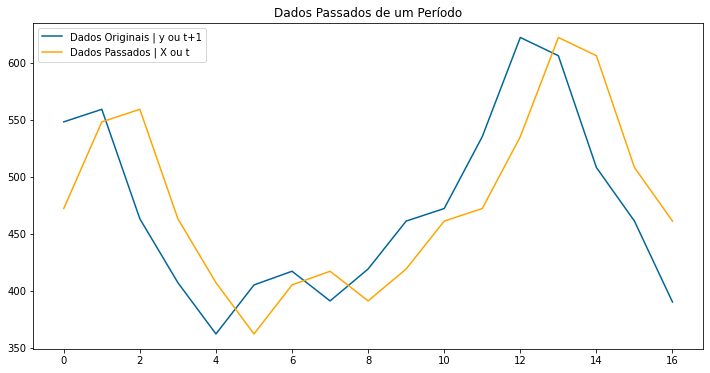

In [28]:
# Gráficos dos dados originais da amostra comparando com uma lag de atraso igual 1
plt.plot(y_test, label='Dados Originais | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados Passados | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados Passados de um Período')
plt.show()

In [8]:
# criando um modelo básico
mdl = Sequential() # modelo sequential
mdl.add(Dense(3, input_dim=lags, activation='relu')) # camada densa
mdl.add(Dense(1)) # camada simples
mdl.compile(loss='mean_squared_error', optimizer='adam') # compilando o modelo com função de perda e optimizador
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2) #especificando o modelo fit

Epoch 1/200
62/62 - 1s - loss: 1139.0535 - 1s/epoch - 23ms/step
Epoch 2/200
62/62 - 0s - loss: 857.3143 - 271ms/epoch - 4ms/step
Epoch 3/200
62/62 - 0s - loss: 866.1158 - 266ms/epoch - 4ms/step
Epoch 4/200
62/62 - 0s - loss: 884.9860 - 260ms/epoch - 4ms/step
Epoch 5/200
62/62 - 0s - loss: 855.9572 - 275ms/epoch - 4ms/step
Epoch 6/200
62/62 - 0s - loss: 875.4236 - 225ms/epoch - 4ms/step
Epoch 7/200
62/62 - 0s - loss: 858.5455 - 217ms/epoch - 3ms/step
Epoch 8/200
62/62 - 0s - loss: 849.8455 - 190ms/epoch - 3ms/step
Epoch 9/200
62/62 - 0s - loss: 858.8939 - 202ms/epoch - 3ms/step
Epoch 10/200
62/62 - 0s - loss: 857.4128 - 162ms/epoch - 3ms/step
Epoch 11/200
62/62 - 0s - loss: 865.8523 - 191ms/epoch - 3ms/step
Epoch 12/200
62/62 - 0s - loss: 849.5498 - 184ms/epoch - 3ms/step
Epoch 13/200
62/62 - 0s - loss: 862.5957 - 186ms/epoch - 3ms/step
Epoch 14/200
62/62 - 0s - loss: 863.4851 - 199ms/epoch - 3ms/step
Epoch 15/200
62/62 - 0s - loss: 852.5677 - 162ms/epoch - 3ms/step
Epoch 16/200
62/62 -

In [9]:
# Avaliando a Performance do Modelo
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de Teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Pontuação de Treino: 837.40 MSE (28.94 RMSE)
Pontuação de teste: 3122.61 MSE (55.88 RMSE)


In [10]:
# Gerar previsões para Treino e Teste
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

In [11]:
# Preparação dos dados para plotagem
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [12]:
# Preparação dos dados para plotagem
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

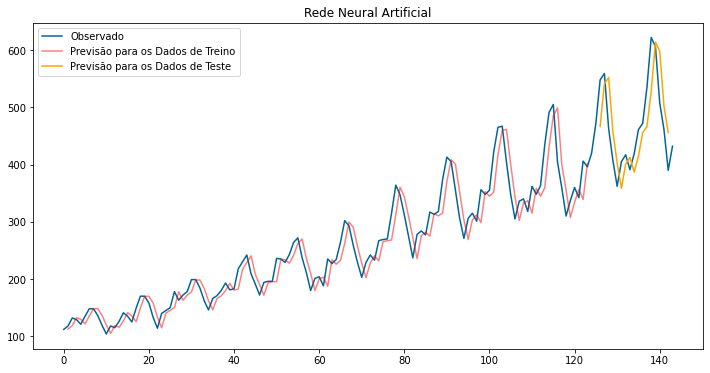

In [29]:
# Plotagem dos dados Observados, Previsão Treino e Previsão Teste
plt.plot(data, label='Observado', color='#006699');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='red', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='Orange');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()